1. K Means
1. 병합 군집
1. DBSCAN

In [1]:
import mglearn

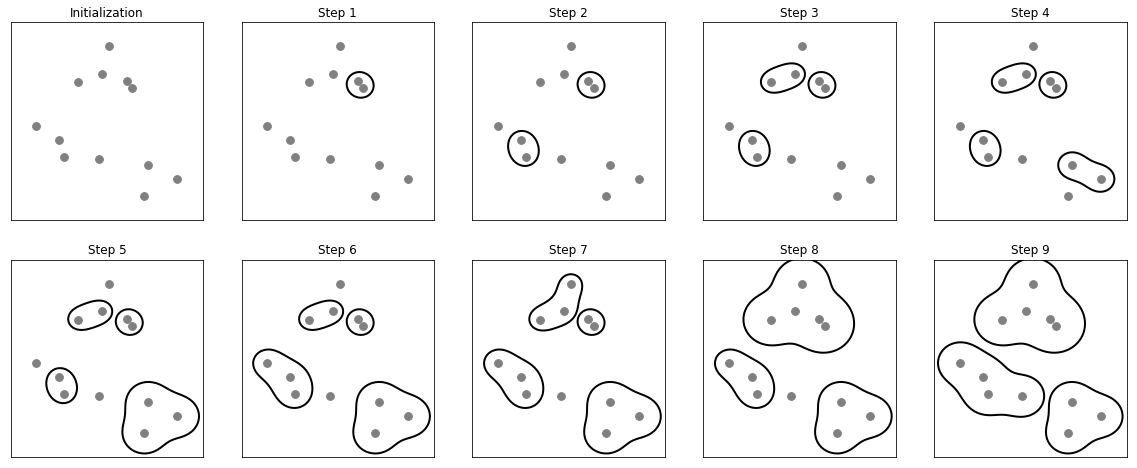

In [2]:
mglearn.plots.plot_agglomerative_algorithm()

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [8]:
x, y = make_blobs()# 실습용 데이터셋
x.shape, y.shape

((100, 2), (100,))

In [37]:
model = AgglomerativeClustering(n_clusters=5)

In [38]:
p = model.fit_predict(x) #predict

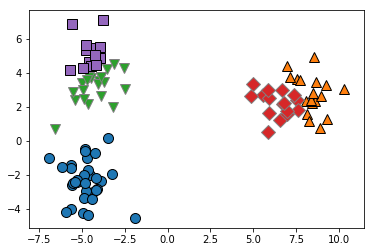

In [39]:
l = mglearn.discrete_scatter(x[:,0],x[:,1], p)

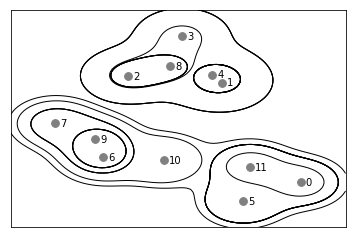

In [40]:
mglearn.plots.plot_agglomerative()

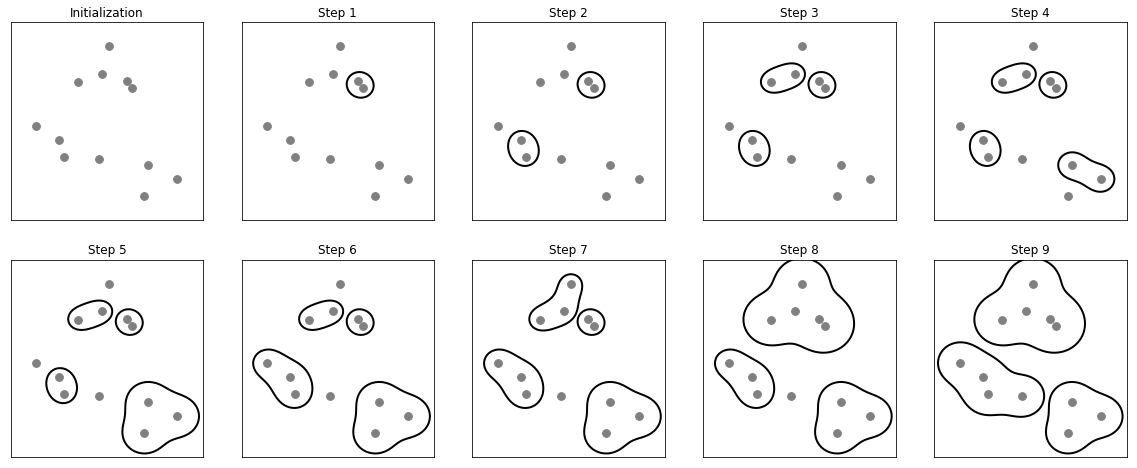

In [42]:
mglearn.plots.plot_agglomerative_algorithm()

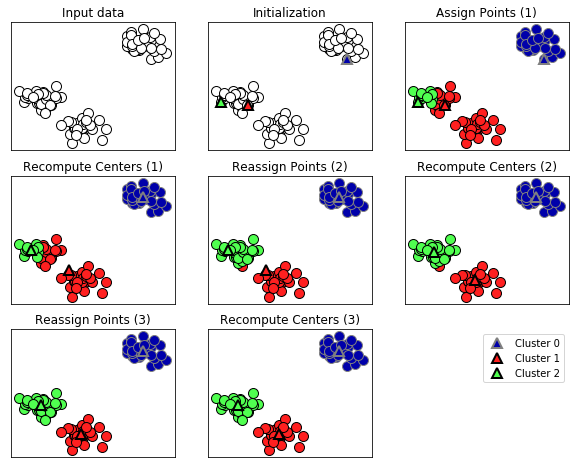

In [41]:
mglearn.plots.plot_kmeans_algorithm()

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


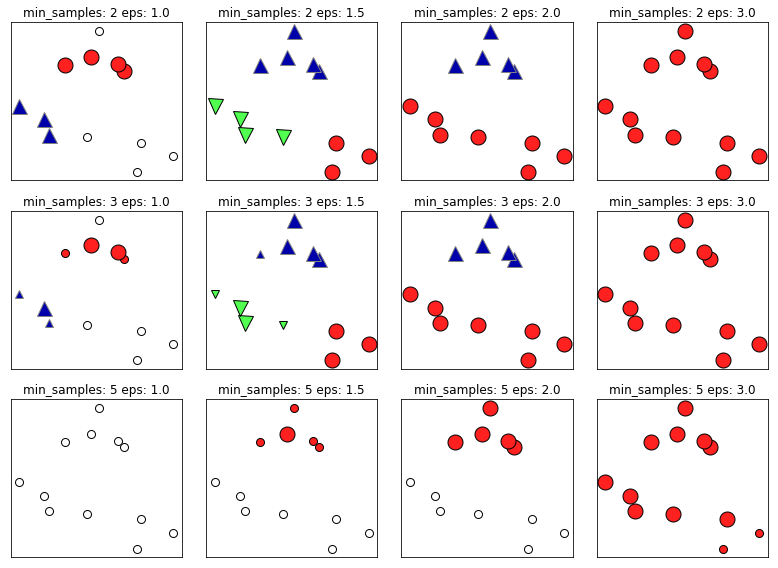

In [43]:
mglearn.plots.plot_dbscan()

In [44]:
from sklearn.cluster import DBSCAN

In [60]:
#min_samples: 클러스터가 되기 위한 최소 샘플수
#eps : 클러스터의 샘플들간의 거리
p = DBSCAN(eps=1.5, min_samples=5).fit_predict(x) # k 개를 정해주지 않습니다

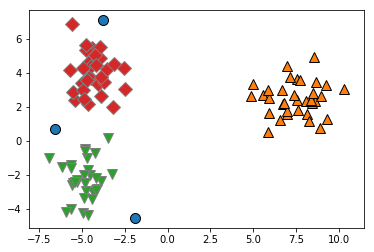

In [61]:
l = mglearn.discrete_scatter(x[:,0],x[:,1], p)

Bank Marketing - 포르투갈의 은행에서 고객에게 예금 상품을 전화 홍보, 결과를 예측
3가지 클러스터링 방식으로 고객들을 클러스터링하세요
상품에 가입해줄 사람과 가입해주지 않은 사람들을 미리 예측할 수 있을까하는 기대

In [66]:
import pandas as pd

df = pd.read_csv('bank/bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [126]:
time_y = df.loc[:, ['duration', 'y']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4DE67BC88>]],
      dtype=object)

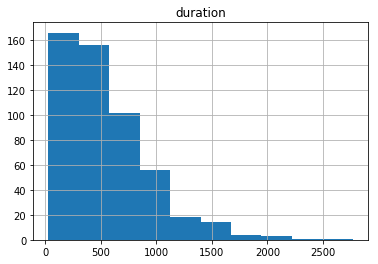

In [133]:
time_y[time_y['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4DE67B470>]],
      dtype=object)

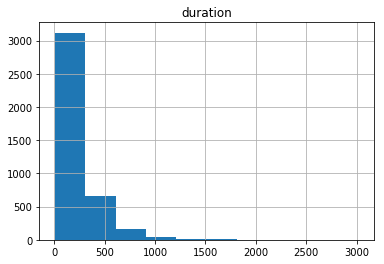

In [132]:
time_y[time_y['y']=='no'].hist()

In [106]:
#np.array(df.values)

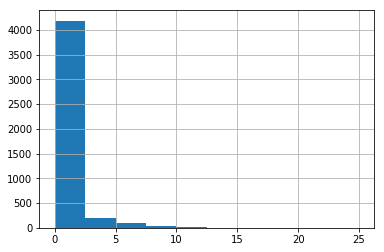

In [97]:
df.previous.hist()

In [77]:
df.isna().sum().sum() #누락은 없다

0

In [71]:
(df['y']=='yes').mean() 

0.11523999115239991

EDA (탐색적 데이터 분석)

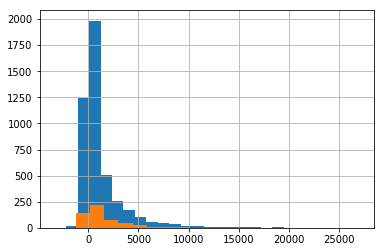

In [96]:
# 데이터[조건]
df[df.balance < 20000].balance.hist(bins=20)
df[df.y =='yes'].balance.hist(bins=20)

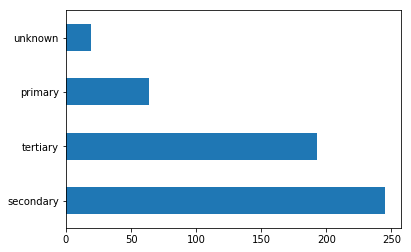

In [102]:
df[df.y =='yes'].education.value_counts().plot.barh()

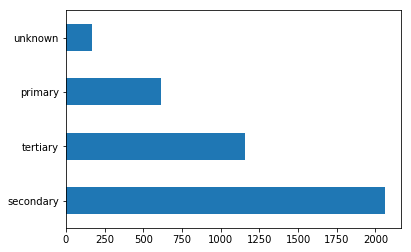

In [103]:
df[df.y =='no'].education.value_counts().plot.barh()

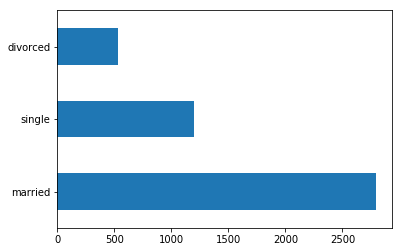

In [85]:
df.marital.value_counts().plot.barh()

In [78]:
j = df['job']

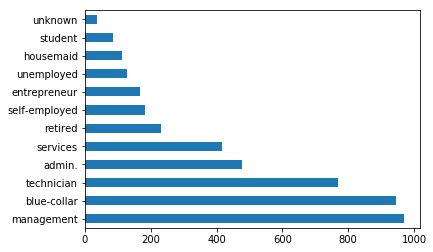

In [84]:
j.value_counts().plot.barh()

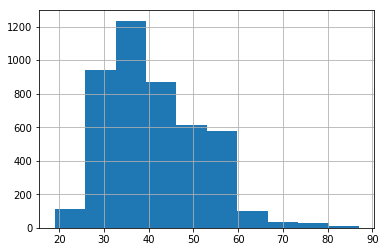

In [73]:
df['age'].hist()

- 3가지 클러스터링(비교사학습)을 하세요
  1. 문자를 숫자로 원핫 인코딩
  1. 2차원으로 축소 PCA
  1. K-Means(k선택), 병합군집(k선택), DBSCAN(eps거리 조절) 
  1. scatter 그래프로 시각화
- 결정 트리 (교사학습)
  1. 원핫 인코딩
  2. X, Y 분리
  3. 결정 트리 학습
  4. 트리 그래프로 시각화
  - 고객에게 전화를 걸어 신상품을 파는 임무를 받았습니다. 가능하면 상품에 가입해줄만한 사람에게 연락을 하고 싶습니다. 상품에 가입해줄 착한 고객을 어떻게 찾으면 좋을까요? 

In [111]:
df_hot = pd.get_dummies(df)
x = df_hot.iloc[:, :-2]
y = df_hot.iloc[:, -2]
x.shape, y.shape

((4521, 51), (4521,))

In [162]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
tree = DecisionTreeClassifier().fit(x,y)
importance = pd.DataFrame(tree.feature_importances_, x.columns)

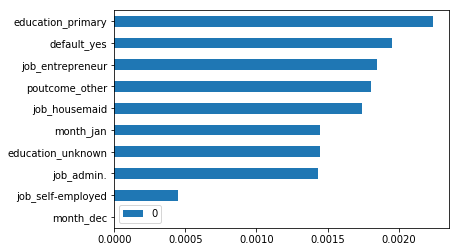

In [161]:
p = importance.sort_values(by=0).head(10).plot.barh()

In [121]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
x_pca = PCA(n_components=2).fit_transform(x)
p = AgglomerativeClustering(n_clusters=2).fit_predict(x_pca)

In [ ]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], y) # 실제로 상품 가입해준 사람

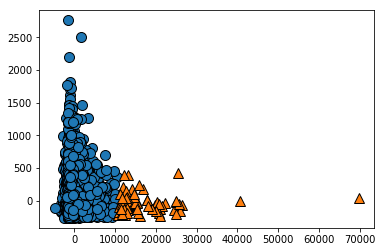

In [122]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], p) # 클러스터링 해본 결과